In [10]:
# 01 - Enhanced Data Exploration and Visualization
## Book Recommendation Dataset (Book-Crossing)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psutil
import os
import gc

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def print_ram_usage():
    process = psutil.Process(os.getpid())
    ram_gb = process.memory_info().rss / (1024 ** 3)
    print(f"Current RAM usage: {ram_gb:.2f} GB")

print_ram_usage()

Current RAM usage: 0.35 GB


In [11]:
## 1. Load Data in Memory-Efficient Way

# Use dtype specification and chunking if needed
# ISBN is string, User-ID int32 to save memory

dtypes_books = {
    'ISBN': 'str',
    'Book-Title': 'str',
    'Book-Author': 'str',
    'Year-Of-Publication': 'str',  
    'Publisher': 'str',
    'Image-URL-S': 'str',
    'Image-URL-M': 'str',
    'Image-URL-L': 'str'
}

dtypes_users = {
    'User-ID': 'int32',
    'Location': 'str',
    'Age': 'float64'
}

dtypes_ratings = {
    'User-ID': 'int32',
    'ISBN': 'str',
    'Book-Rating': 'int8'  # 0-10 fits in int8
}

# Load
books = pd.read_csv('data/raw/Books.csv', dtype=dtypes_books, low_memory=False)
users = pd.read_csv('data/raw/Users.csv', dtype=dtypes_users)
ratings = pd.read_csv('data/raw/Ratings.csv', dtype=dtypes_ratings)

print(f"Books: {books.shape}")
print(f"Users: {users.shape}")
print(f"Ratings: {ratings.shape}")
print_ram_usage()

Books: (271360, 8)
Users: (278858, 3)
Ratings: (1149780, 3)
Current RAM usage: 0.40 GB


In [12]:
# Quick look at the data with .head() and .tail()

print("\n=== Books.csv - First 5 rows ===")
display(books.head())

print("\n=== Books.csv - Last 5 rows ===")
display(books.tail())

print("\n=== Users.csv - First 5 rows ===")
display(users.head())

print("\n=== Ratings.csv - First 5 rows ===")
display(ratings.head())


=== Books.csv - First 5 rows ===


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...



=== Books.csv - Last 5 rows ===


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...



=== Users.csv - First 5 rows ===


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN



=== Ratings.csv - First 5 rows ===


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
# Basic info and missing values
print("\n=== Dataset Info ===")
print("\nBooks info:")
books.info()

print("\n\nUsers missing values:")
print(users.isnull().sum())

print("\n\nRatings missing values:")
print(ratings.isnull().sum())


=== Dataset Info ===

Books info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Users missing values:
User-ID          0
Location         0
Age         110762
dtype: int64


Ratings missing values:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


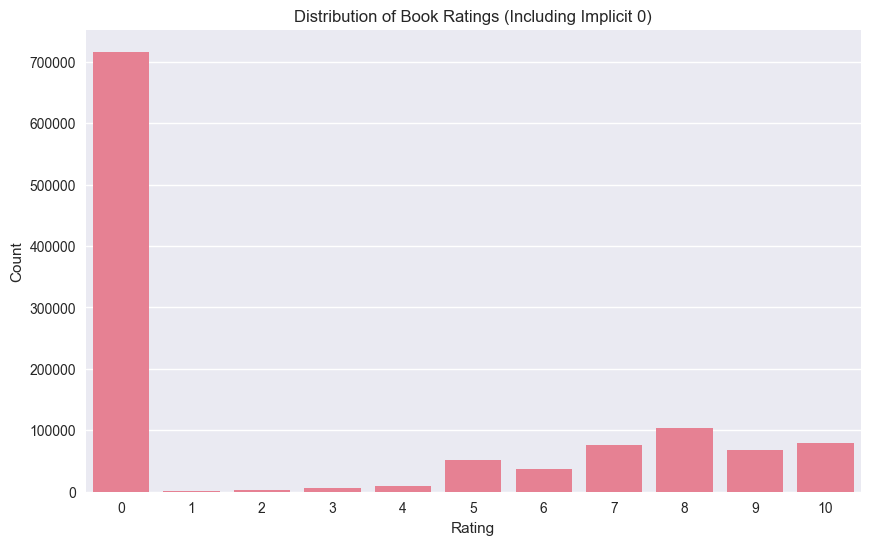

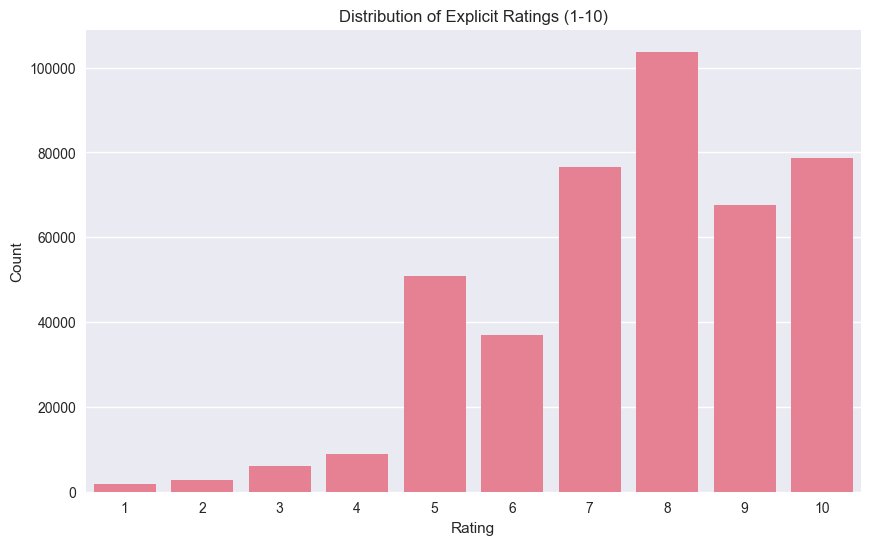

In [14]:
# Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=ratings, x='Book-Rating', order=sorted(ratings['Book-Rating'].unique()))
plt.title('Distribution of Book Ratings (Including Implicit 0)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Separate explicit ratings
explicit_ratings = ratings[ratings['Book-Rating'] > 0]
plt.figure(figsize=(10, 6))
sns.countplot(data=explicit_ratings, x='Book-Rating')
plt.title('Distribution of Explicit Ratings (1-10)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [15]:
# Top 10 Most Rated Books
book_ratings_count = ratings[ratings['Book-Rating'] > 0]['ISBN'].value_counts().head(10)
top_books = books[books['ISBN'].isin(book_ratings_count.index)].set_index('ISBN').loc[book_ratings_count.index]
top_books['Rating_Count'] = book_ratings_count.values

plt.figure(figsize=(12, 8))
sns.barplot(data=top_books.reset_index(), y='Book-Title', x='Rating_Count', palette='viridis')
plt.title('Top 10 Most Rated Books (Explicit Ratings)')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

display(top_books[['Book-Title', 'Book-Author', 'Rating_Count']])

KeyError: "['0679781587'] not in index"

C:\Users\hiwi\AppData\Local\Temp\ipykernel_9588\970712389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index.astype(str), palette='magma')


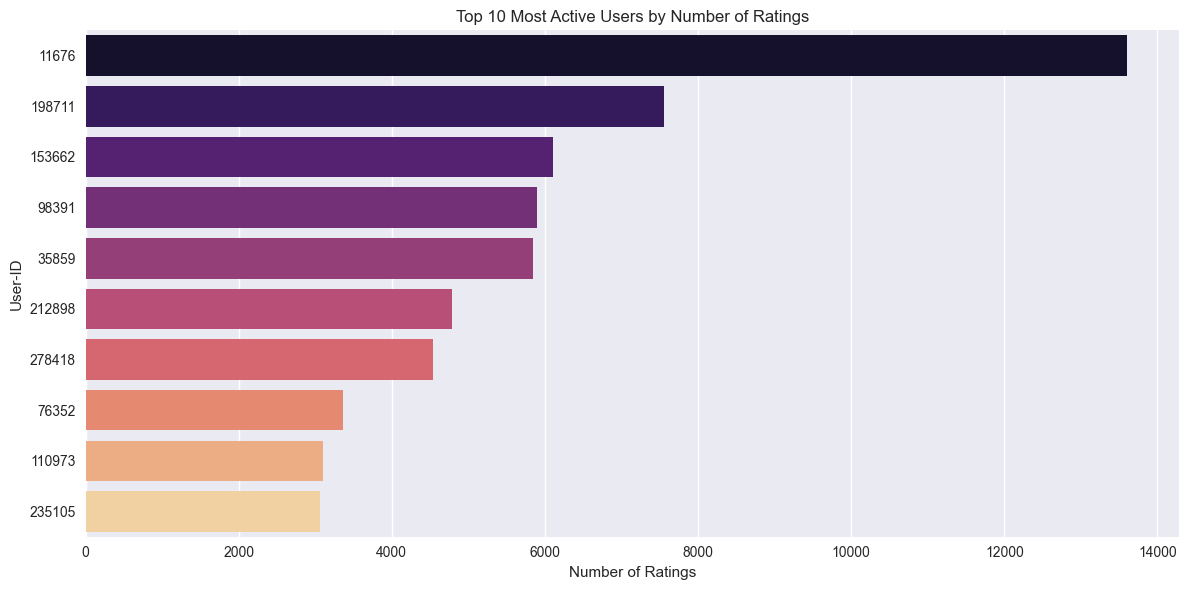

In [16]:
# Top 10 Most Active Users
top_users = ratings['User-ID'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.values, y=top_users.index.astype(str), palette='magma')
plt.title('Top 10 Most Active Users by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('User-ID')
plt.tight_layout()
plt.show()

In [5]:
## 3. Filtering Strategy 

###We need to reduce to ~50k–80k explicit ratings while keeping meaningful structure.

###Steps:
###1. Keep only explicit ratings (>0)
###2. Remove users with very few ratings
###3. Remove books with very few ratings
###4. Iteratively tighten thresholds until target size
###5. Ensure reasonable number of users and books

# Start with explicit ratings
df = explicit_ratings.copy()
gc.collect()

print(f"After explicit only: {len(df)} ratings")

# Initial thresholds
min_user_ratings = 20   # user must have rated at least 20 books
min_book_ratings = 20   # book must have at least 20 ratings

active_users = df['User-ID'].value_counts()[df['User-ID'].value_counts() >= min_user_ratings].index
popular_books = df['ISBN'].value_counts()[df['ISBN'].value_counts() >= min_book_ratings].index

df = df[df['User-ID'].isin(active_users) & df['ISBN'].isin(popular_books)]
print(f"After min 20 ratings per user/book: {len(df)} ratings")
print(f"Users: {df['User-ID'].nunique()}, Books: {df['ISBN'].nunique()}")

After explicit only: 433671 ratings
After min 20 ratings per user/book: 47610 ratings
Users: 3404, Books: 2178


In [6]:
## 4. Further Downsampling if Needed

# Target: 50k–80k ratings (safe for LightGCN on CPU)
target_max = 80000

if len(df) > target_max:
    print("Still too large → further filtering")
    
    # Option A: Increase thresholds
    min_user_ratings = 30
    min_book_ratings = 30
    
    active_users = df['User-ID'].value_counts()[df['User-ID'].value_counts() >= min_user_ratings].index
    popular_books = df['ISBN'].value_counts()[df['ISBN'].value_counts() >= min_book_ratings].index
    
    df = df[df['User-ID'].isin(active_users) & df['ISBN'].isin(popular_books)]
    
    print(f"After stricter thresholds: {len(df)} ratings")
    print(f"Users: {df['User-ID'].nunique()}, Books: {df['ISBN'].nunique()}")

# Option B: If still too big, randomly sample users
if len(df) > target_max:
    print("Still large → random sampling of users")
    np.random.seed(42)
    sample_users = np.random.choice(df['User-ID'].unique(), size=3000, replace=False)  # adjust
    df = df[df['User-ID'].isin(sample_users)]
    print(f"After user sampling: {len(df)} ratings")

print("\nFinal filtered dataset:")
print(f"Ratings: {len(df)}")
print(f"Users: {df['User-ID'].nunique()}")
print(f"Books: {df['ISBN'].nunique()}")



Final filtered dataset:
Ratings: 47610
Users: 3404
Books: 2178


In [7]:
## 5. Merge Book Metadata for Later Use

# Keep only books that survived filtering
filtered_books = books[books['ISBN'].isin(df['ISBN'].unique())][['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']].copy()

# Basic cleaning of year
filtered_books['Year-Of-Publication'] = pd.to_numeric(filtered_books['Year-Of-Publication'], errors='coerce')
filtered_books = filtered_books[filtered_books['Year-Of-Publication'].between(1900, 2025)]

print(f"Filtered books with metadata: {len(filtered_books)}")

Filtered books with metadata: 2112


In [8]:
## 6. Save Filtered Data

# Create processed folder if not exists
os.makedirs('data/processed', exist_ok=True)

# Save
df.to_csv('data/processed/filtered_ratings.csv', index=False)
filtered_books.to_csv('data/processed/books_filtered.csv', index=False)

# Also save filtered user ids (optional)
filtered_users = users[users['User-ID'].isin(df['User-ID'].unique())]
filtered_users.to_csv('data/processed/users_filtered.csv', index=False)

print("Saved filtered data:")
print("- filtered_ratings.csv")
print("- books_filtered.csv")
print("- users_filtered.csv")
print_ram_usage()

Saved filtered data:
- filtered_ratings.csv
- books_filtered.csv
- users_filtered.csv
Current RAM usage: 0.35 GB


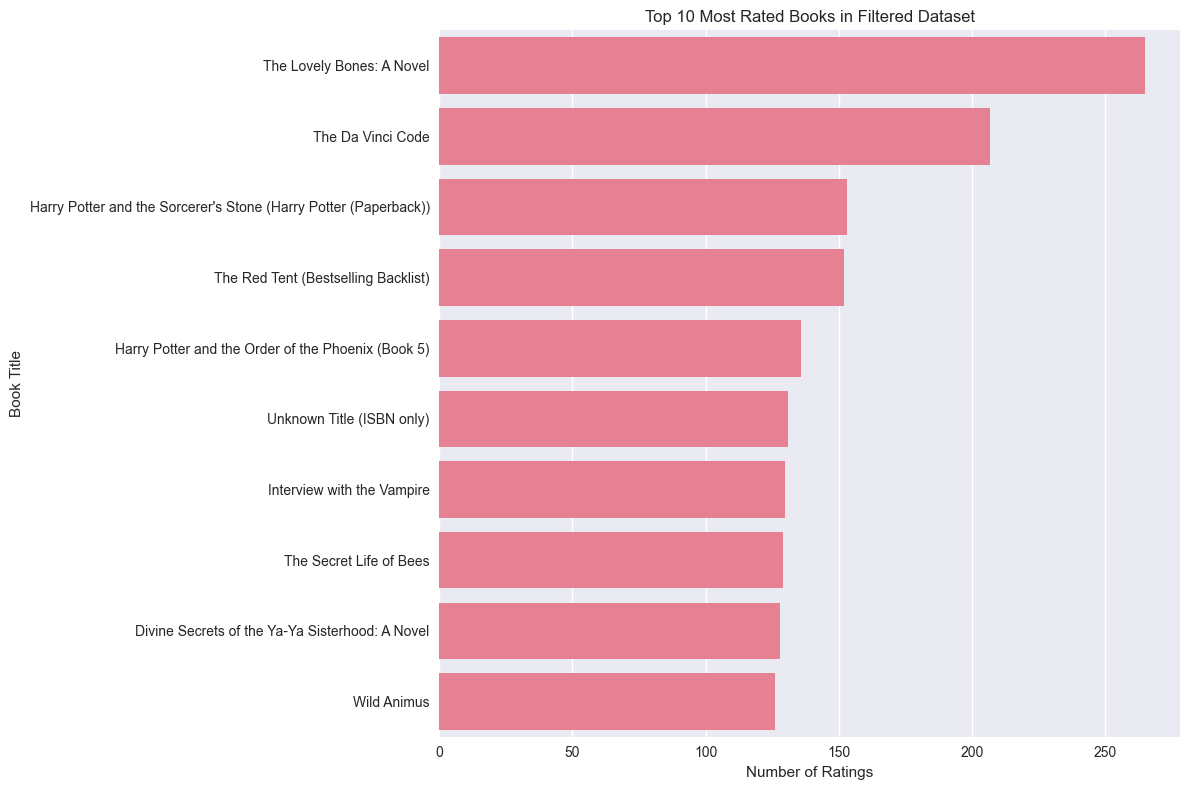

In [9]:
## 7. Final Summary Visualization ion)

# Top 10 most rated books in filtered set
top_books = df['ISBN'].value_counts().head(10)

# Safely merge titles (left join to keep all top ISBNs)
top_titles_df = pd.DataFrame({'ISBN': top_books.index})
top_titles_df = top_titles_df.merge(
    filtered_books[['ISBN', 'Book-Title']], 
    on='ISBN', 
    how='left'
)
top_titles_df['Book-Title'] = top_titles_df['Book-Title'].fillna('Unknown Title (ISBN only)')

# Use the titles (with fallbacks)
titles = top_titles_df['Book-Title'].values
counts = top_books.values

plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=titles)
plt.title('Top 10 Most Rated Books in Filtered Dataset')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()